In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
TsingTao=pd.read_csv('TsingTao.csv',index_col='Date')
TsingTao.index=pd.to_datetime(TsingTao.index)
TsingTao.Volume=TsingTao.Volume.replace(0,np.nan)
TsingTao=TsingTao.dropna()
close=TsingTao.Close
Volume=TsingTao.Volume

In [24]:
TsingTao.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-02,1,48.80,48.98,46.90,47.81,2592800.0
2014-01-03,2,47.60,48.38,47.01,47.59,1560700.0
2014-01-06,3,47.63,47.79,46.62,46.70,1860900.0
2014-01-07,4,46.48,47.15,45.48,46.51,2934400.0
2014-01-08,5,46.46,46.88,46.00,46.51,1800400.0


In [3]:
close.head(4)

Date
2014-01-02    47.81
2014-01-03    47.59
2014-01-06    46.70
2014-01-07    46.51
Name: Close, dtype: float64

In [4]:
close.diff().head(4)

Date
2014-01-02     NaN
2014-01-03   -0.22
2014-01-06   -0.89
2014-01-07   -0.19
Name: Close, dtype: float64

In [5]:

difClose=close.diff()
difClose[0]=0


In [6]:
difClose.head(5)

Date
2014-01-02    0.00
2014-01-03   -0.22
2014-01-06   -0.89
2014-01-07   -0.19
2014-01-08    0.00
Name: Close, dtype: float64

In [7]:
((difClose>=0)*2-1).head(20)

Date
2014-01-02    1
2014-01-03   -1
2014-01-06   -1
2014-01-07   -1
2014-01-08    1
2014-01-09   -1
2014-01-10   -1
2014-01-13   -1
2014-01-14   -1
2014-01-15   -1
2014-01-16    1
2014-01-17   -1
2014-01-20   -1
2014-01-21    1
2014-01-22    1
2014-01-23   -1
2014-01-24   -1
2014-01-27   -1
2014-01-28   -1
2014-01-29   -1
Name: Close, dtype: int32

In [8]:
OBV=(((difClose>=0)*2-1)*Volume).cumsum()
OBV.name='OBV'
OBV.head()
OBV.describe()

count    2.950000e+02
mean    -1.803521e+07
std      2.812896e+07
min     -6.132070e+07
25%     -3.683520e+07
50%     -2.690400e+07
75%     -1.395800e+06
max      5.288770e+07
Name: OBV, dtype: float64

In [9]:
OBV.head(500)

Date
2014-01-02     2592800.0
2014-01-03     1032100.0
2014-01-06     -828800.0
2014-01-07    -3763200.0
2014-01-08    -1962800.0
2014-01-09    -5723700.0
2014-01-10    -7795500.0
2014-01-13   -11791000.0
2014-01-14   -17285000.0
2014-01-15   -20259700.0
2014-01-16   -16999700.0
2014-01-17   -19192300.0
2014-01-20   -21053700.0
2014-01-21   -19185900.0
2014-01-22   -17059700.0
2014-01-23   -19430500.0
2014-01-24   -21756100.0
2014-01-27   -25471700.0
2014-01-28   -29248800.0
2014-01-29   -33460400.0
2014-01-30   -29436400.0
2014-02-07   -30858800.0
2014-02-10   -29110800.0
2014-02-11   -27185300.0
2014-02-12   -29256400.0
2014-02-13   -31318500.0
2014-02-14   -33405600.0
2014-02-17   -41949400.0
2014-02-18   -46999200.0
2014-02-19   -51921700.0
                 ...    
2015-02-02    39401400.0
2015-02-03    35085200.0
2015-02-04    31225200.0
2015-02-05    26571600.0
2015-02-06    23749400.0
2015-02-09    25956500.0
2015-02-10    28576600.0
2015-02-11    30335100.0
2015-02-12    280400

In [10]:
import movingAverage as mv
smOBV=mv.smaCal(OBV,9)
smOBV.tail()

Date
2015-03-16    3.991544e+07
2015-03-17    3.766462e+07
2015-03-18    3.691176e+07
2015-03-19    3.521347e+07
2015-03-20    3.290640e+07
dtype: float64

In [11]:

AdjOBV=((close-TsingTao.Low)-(TsingTao.High-close)\
         )/(TsingTao.High-TsingTao.Low)*Volume
AdjOBV.name='AdjOBV'
AdjOBV.head()
AdjOBVd=AdjOBV.cumsum()
AdjOBVd.name='AdjOBVd'
AdjOBVd.describe()

count    2.950000e+02
mean     3.321797e+07
std      3.775135e+07
min     -1.589447e+07
25%     -1.936188e+06
50%      3.098348e+07
75%      6.132125e+07
max      1.128814e+08
Name: AdjOBVd, dtype: float64

In [12]:
AdjOBV.head()

Date
2014-01-02   -3.241000e+05
2014-01-03   -2.392314e+05
2014-01-06   -1.606418e+06
2014-01-07    6.852790e+05
2014-01-08    2.864273e+05
Name: AdjOBV, dtype: float64

C:\Users\netease\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\netease\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


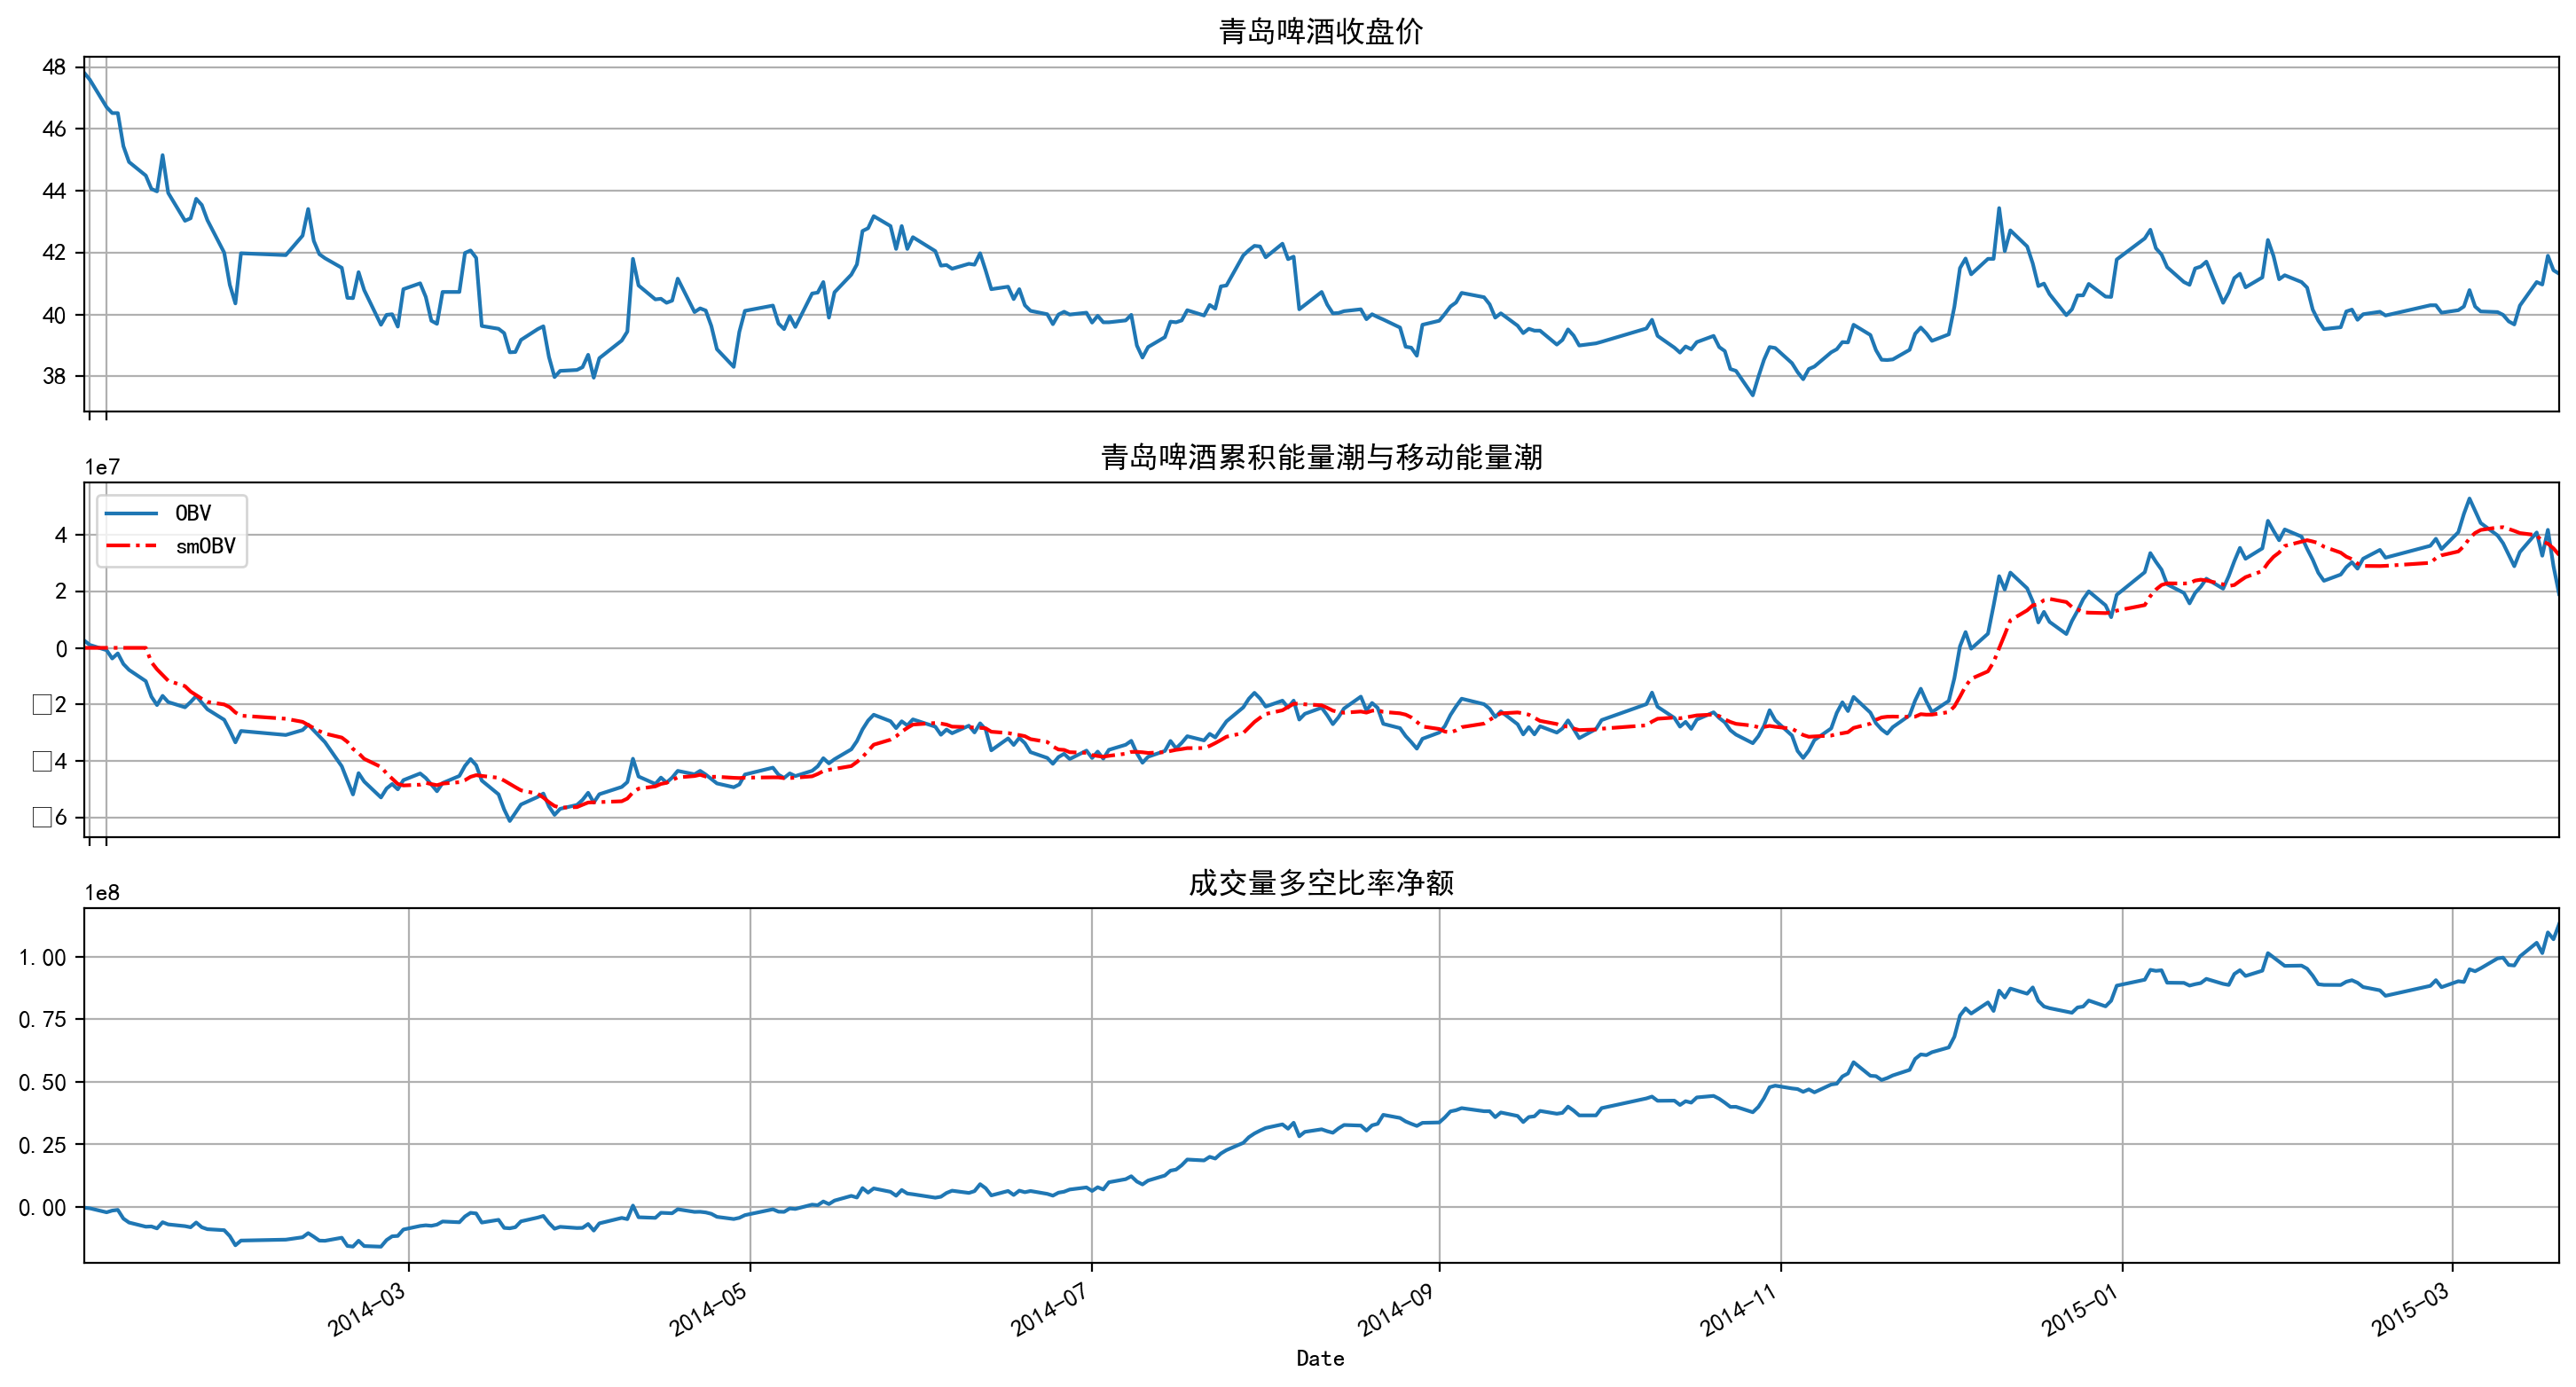

In [13]:
plt.rcParams['font.sans-serif']=['SimHei']
fig = plt.figure(figsize=(18, 10), dpi=200)
ax1=plt.subplot(3,1,1)

close.plot(title='青岛啤酒收盘价')
plt.xticks(close.index[1:3],(''))
plt.xlabel('')
ax2=plt.subplot(3,1,2)
OBV.plot(label='OBV',title='青岛啤酒累积能量潮与移动能量潮')
smOBV.plot(label='smOBV',linestyle='-.',color='r')
plt.legend(loc='upper left')
plt.xticks(close.index[1:3],(''))
plt.xlabel('')
ax3=plt.subplot(3,1,3)
AdjOBVd.plot(title='成交量多空比率净额')
for ax in ax1,ax2,ax3:
    ax.grid(True)

In [14]:
!pip install ffn

In [15]:
import ffn
def trade(obv,price):
    signal=(2*(obv.diff()>0)-1)[1:]
    ret=ffn.to_returns(price)[1:]
    ret.name='ret'
    tradeRet=ret*signal.shift(1)
    tradeRet.name='tradeRet'
    Returns=pd.merge(pd.DataFrame(ret),\
                     pd.DataFrame(tradeRet),\
                    left_index=True,right_index=True).dropna()
    return(Returns)

In [16]:
OBVtrade=trade(OBV,close)
OBVtrade.iloc[50:,:]

,ret,tradeRet
Date,,
2014-03-24,0.008933,0.008933
2014-03-25,0.002277,0.002277
2014-03-26,-0.024987,-0.024987
2014-03-27,-0.016826,0.016826
2014-03-28,0.005266,-0.005266
2014-03-31,0.000786,0.000786
2014-04-01,0.002355,0.002355
2014-04-02,0.010444,0.010444
2014-04-03,-0.019121,-0.019121


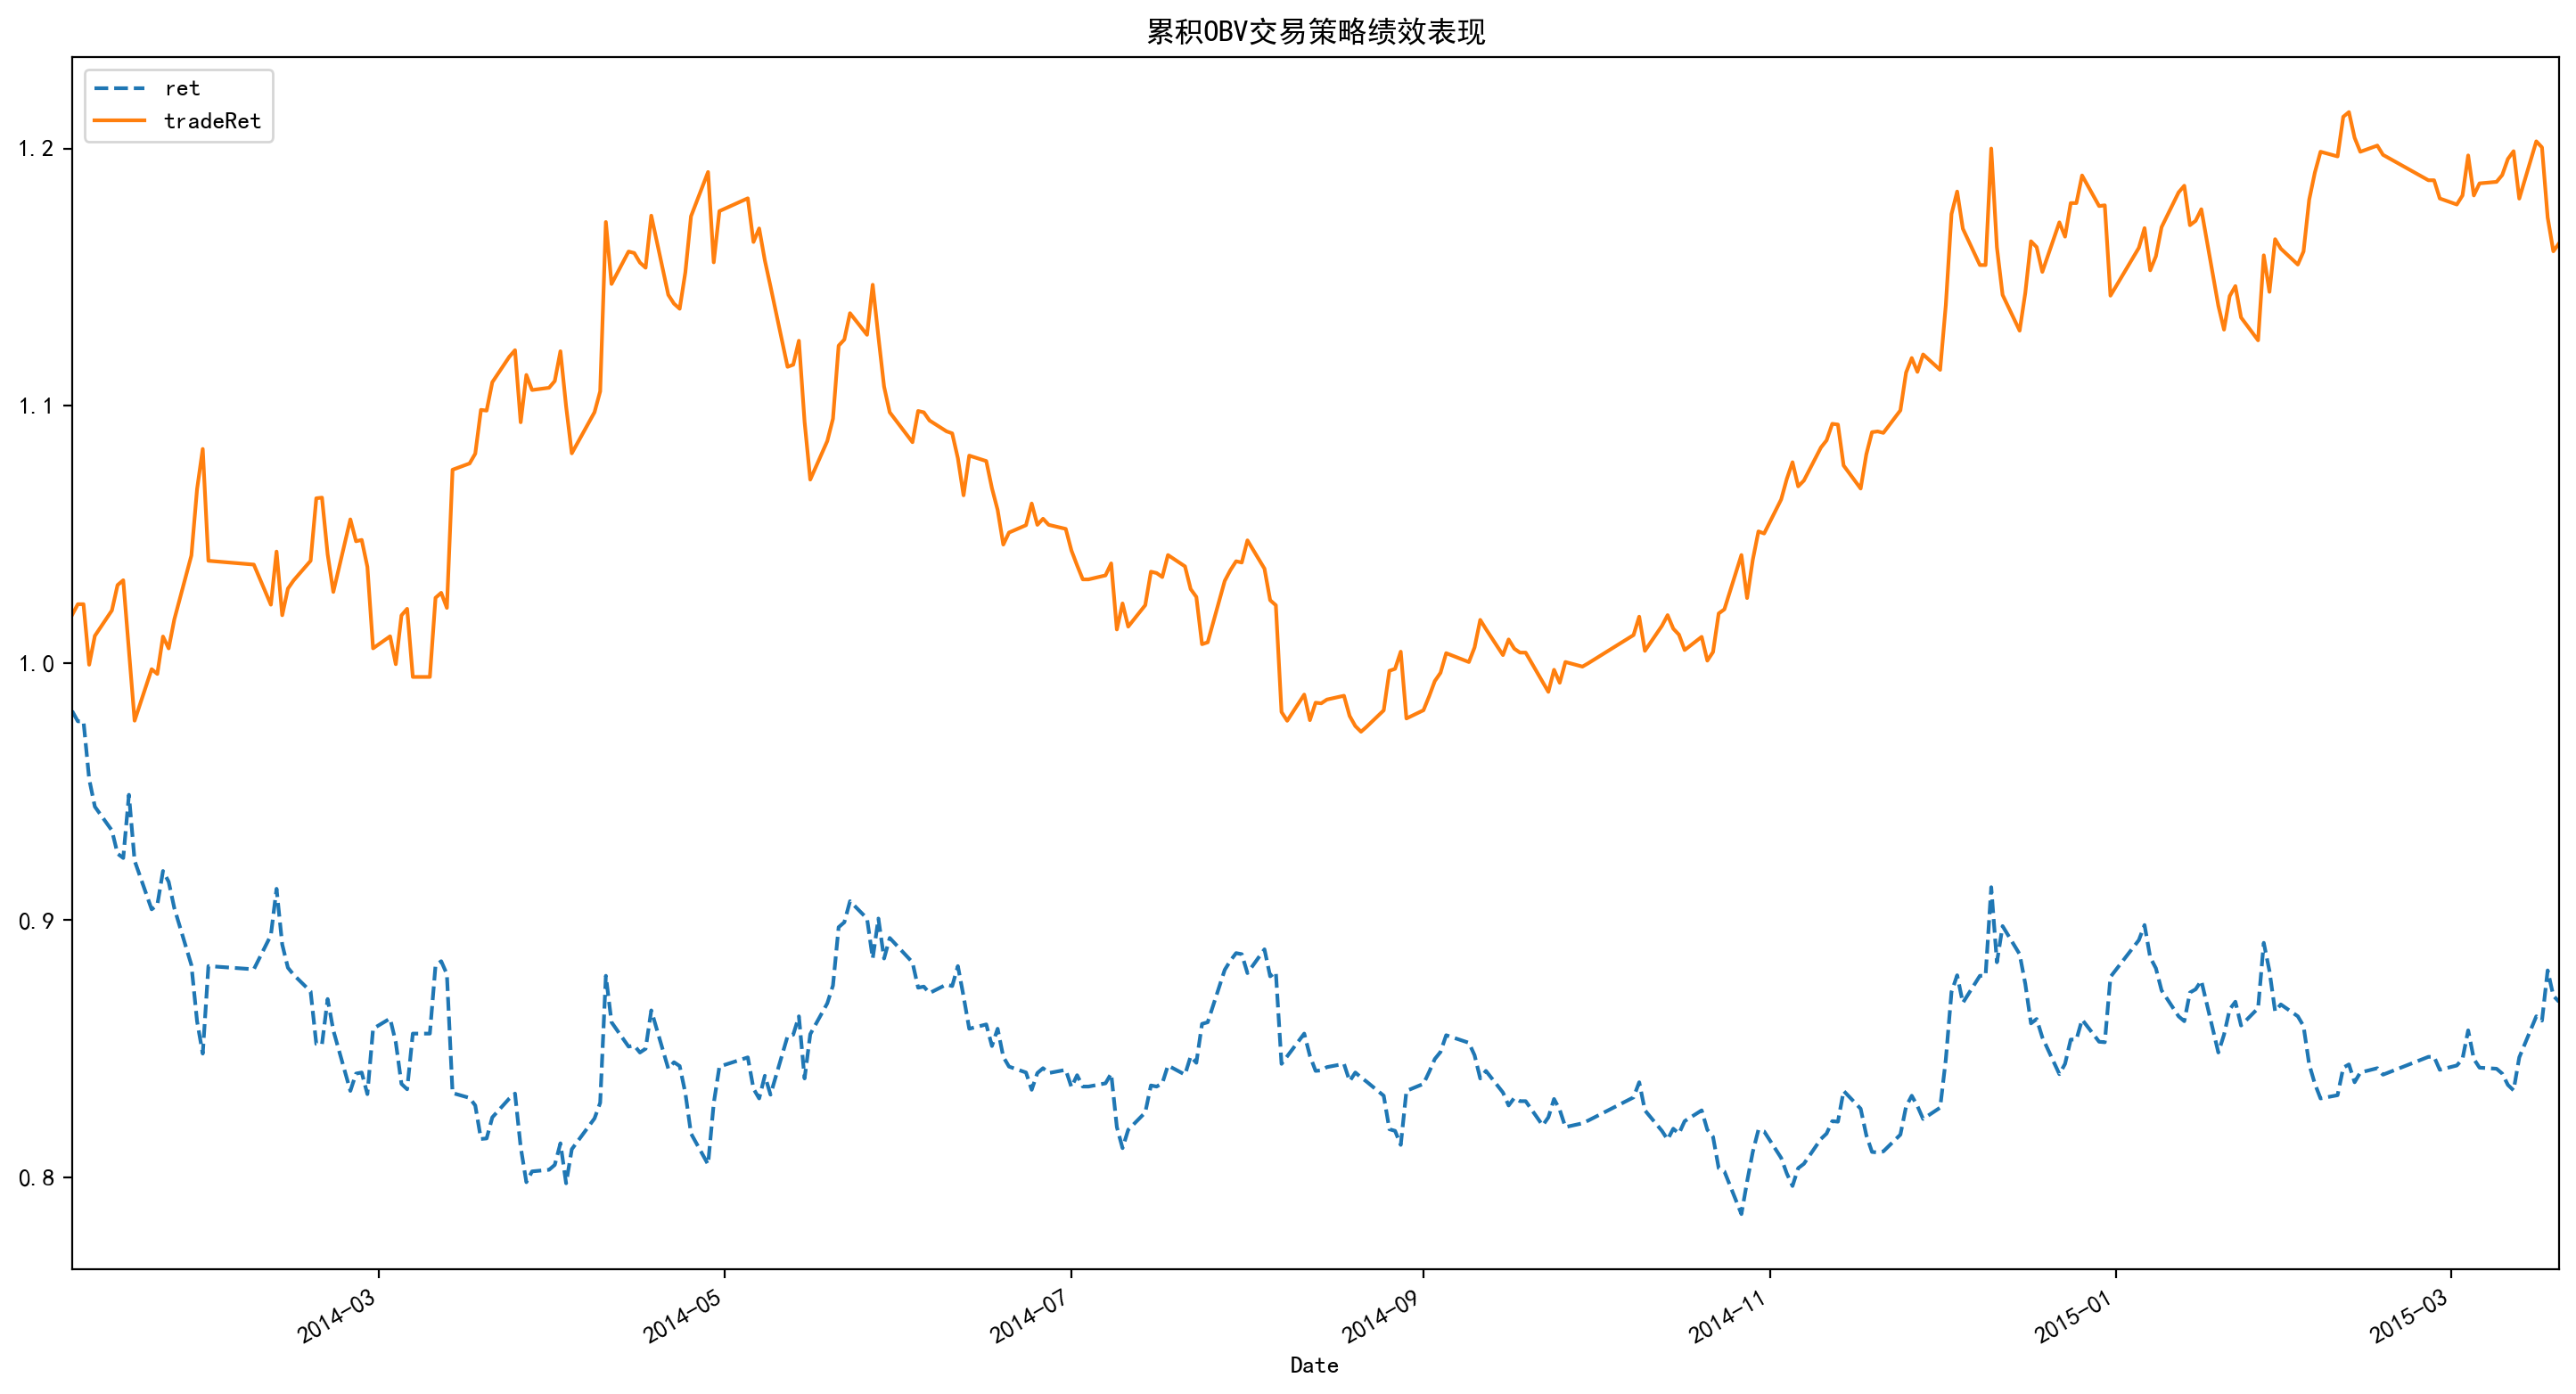

In [17]:
fig = plt.figure(figsize=(18, 10), dpi=200)
ret=OBVtrade.ret
tradeRet=OBVtrade.tradeRet
ret.name='BuyAndHold'
tradeRet.name='OBVTrade'
(1+ret).cumprod().plot(label='ret',linestyle='dashed')
(1+tradeRet).cumprod().plot(label='tradeRet')
plt.title('累积OBV交易策略绩效表现')
plt.legend()

In [18]:
def backtest(ret,tradeRet):
    def performance(x):
        winpct=len(x[x>0])/len(x[x!=0])
        annRet=(1+x).cumprod()[-1]**(245/len(x))-1
        sharpe=ffn.calc_risk_return_ratio(x)
        maxDD=ffn.calc_max_drawdown((1+x).cumprod())
        perfo=pd.Series([winpct,annRet,sharpe,maxDD],index=['win rate',
                        'annualized return',\
                        'sharpe ratio','maximum drawdown'])
        return(perfo)
    BuyAndHold=performance(ret)
    OBVTrade=performance(tradeRet)
    return(pd.DataFrame({ret.name:BuyAndHold,\
    tradeRet.name:OBVTrade}))

In [19]:
smOBVtrade=trade(smOBV,close)
smOBVtrade.head(n=3)

,ret,tradeRet
Date,,
2014-01-06,-0.018701,0.018701
2014-01-07,-0.004069,0.004069
2014-01-08,0.000000,-0.000000


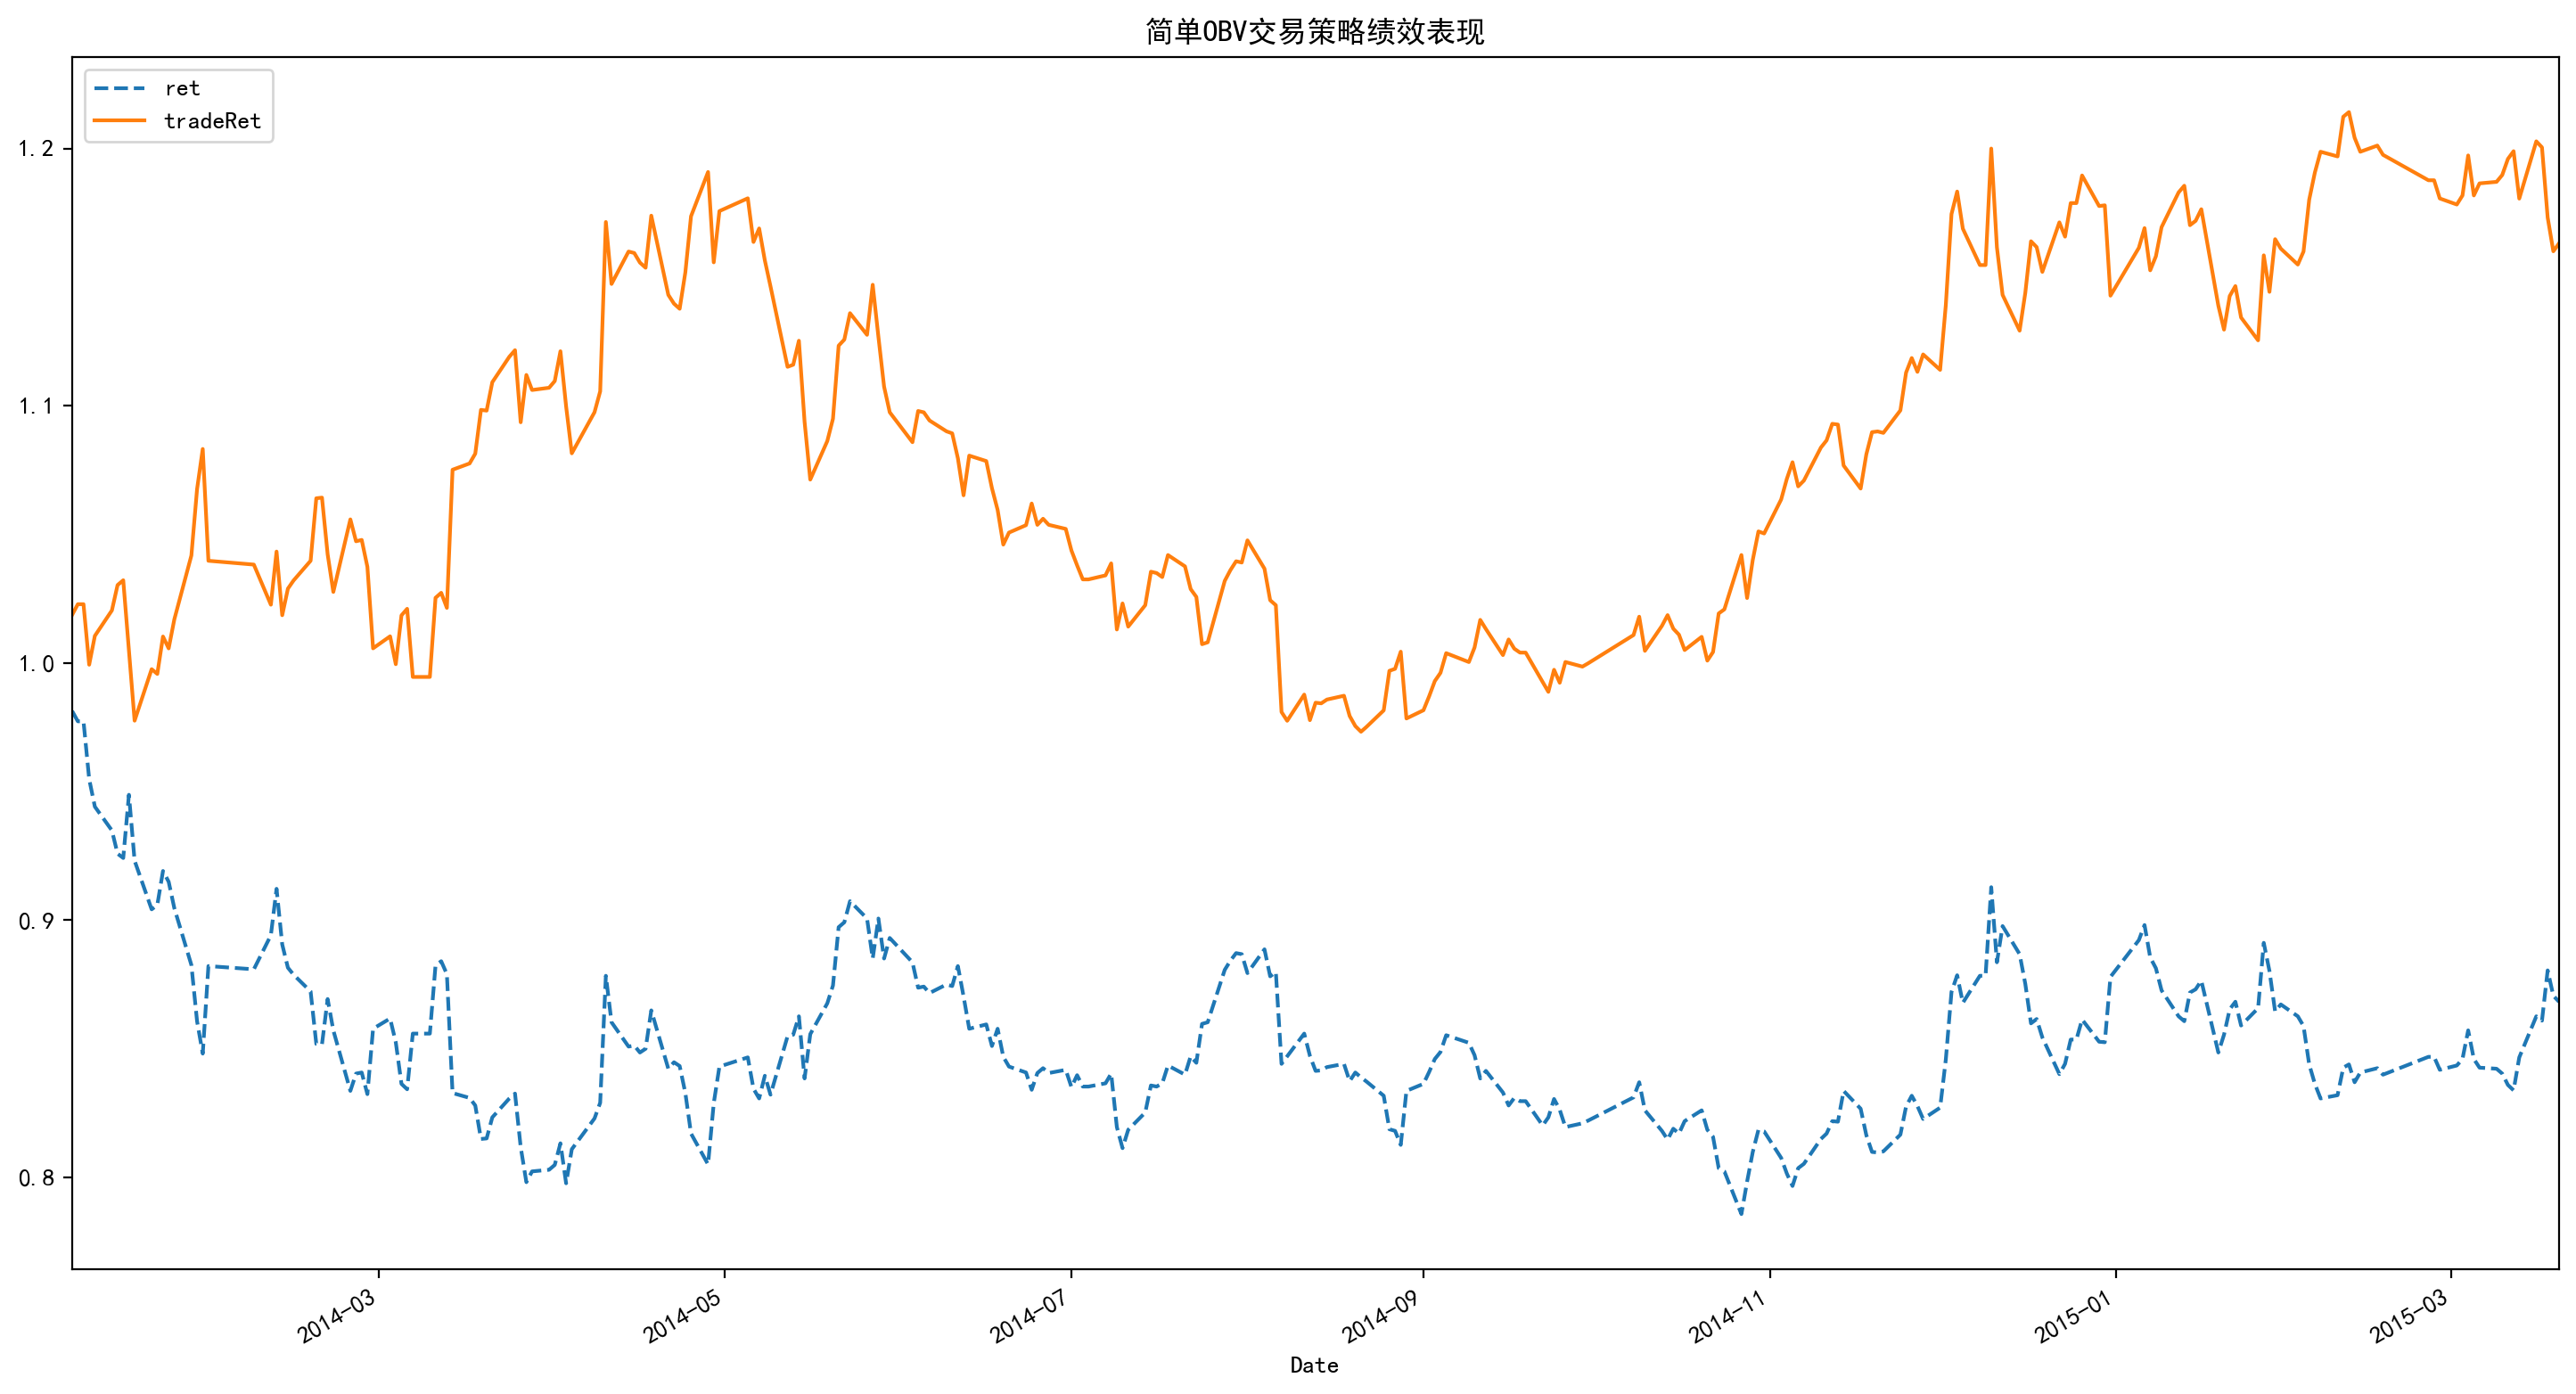

In [20]:
fig = plt.figure(figsize=(18, 10), dpi=200)
ret=smOBVtrade.ret
ret.name='BuyAndHold'
smtradeRet=smOBVtrade.tradeRet
smtradeRet.name='smOBVTrade'
(1+ret).cumprod().plot(label='ret',linestyle='dashed')
(1+tradeRet).cumprod().plot(label='tradeRet')
plt.title('简单OBV交易策略绩效表现')
plt.legend()

In [21]:
test=backtest(ret,smtradeRet)
test

,BuyAndHold,smOBVTrade
win rate,0.489510,0.524476
annualized return,-0.111421,0.110775
sharpe ratio,-0.028850,0.038419
maximum drawdown,-0.199358,-0.124408
